In [50]:
import sklearn
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

faces=fetch_olivetti_faces()
X,y=faces.data,faces.target


In [51]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index,test_index in sss.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
X_train.shape

(320, 4096)

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X_train)
    kmeans_per_k.append(kmeans)


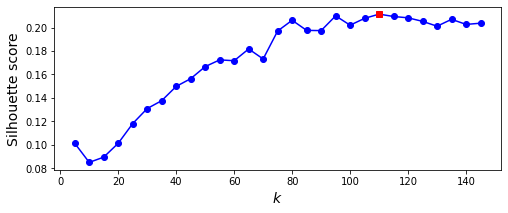

In [59]:
silhouette_scores=[silhouette_score(X_train,model.labels_) for model in kmeans_per_k]
best_index=np.argmax(silhouette_scores)
best_k=k_range[best_index]
best_score=silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range,silhouette_scores,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.plot(best_k,best_score,"rs")
plt.show()

In [60]:
best_model=kmeans_per_k[best_index]

In [61]:
def plot_faces(faces,labels,n_cols=5):
    n_rows=(len(faces)-1)//n_cols+1
    plt.figure(figsize=(ncols,n_rows*1.1))
    for index, (face,label) in enumerate(zip(faces,labels)):
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(face.reshape(64,64),cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
for cluster_id in np.unique(best_model.labels_):
    print("Cluster",cluster_id)
    in_cluster=best_model.labels_==cluster_id
    faces=X_train[in_cluster].reshape(-1,64,64)
    labels=y_train[in_cluster]
    plot_faces(faces,labels)


Cluster 0


NameError: name 'ncols' is not defined